# Regresión lineal con redes neuronales

In [3]:
%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

## Una clase para representar una capa de neuronas

Aunque en nuestro ejemplo de regresión, la capa solo tendrá una neurona, esta clase puede usarse para representar arquitecturas más complejas.

In [7]:
class Layer_Dense:
    """A layer of neurons in a neural network."""
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues) 
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

## Función de pérdidas

Para el caso de regresión, se suele utilizar el error cuadrático medio

In [5]:
class Loss_MeanSquaredError:
    """Mean squared error loss."""

    # Forward pass
    def forward(self, y_pred, y_true):
        # Calculate sample losses
        sample_losses = np.mean(0.5*(y_true - y_pred)**2, axis=-1)
        
        # Return loss
        return sample_losses

    # Backward pass
    def backward(self, y_pred, y_true):

        # Gradient on the outputs
        self.dinputs = -(y_true - y_pred)

        # Normalize gradient 
        samples = len(y_pred)
        self.dinputs = self.dinputs / samples

## Optimizador

Usaremos un simple descenso de gradiente

In [8]:
class Optimizer_SGD:
    """Simple stochastic gradient descent optimizer."""
    # Initialize optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

# Caso de estudio

Una base de datos muy simple, introducida ya con las dimensiones apropiadas para servir de input en nuestra red

In [9]:
# Test case
X = np.array([[1], [2], [3], [4]])
y = np.array([6, 5, 7, 10]).reshape(len(X), 1)

Podemos visualizarla así:

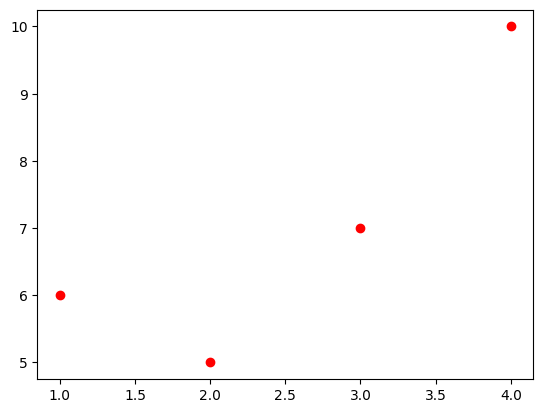

In [10]:
plt.plot(X[:, np.newaxis, 0], y, 'ro')

## Definición de la arquitectura de la red

In [11]:
dense1 = Layer_Dense(X.shape[1], 1)
# Activation function is linear (omitted)
loss_layer = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=0.01)

## Entrenamiento y resultados

In [15]:
# Train loop
for epoch in range(1000):

    # Forward pass
    dense1.forward(X)
    loss = loss_layer.forward(dense1.output, y)
    
    if not epoch % 100:
        print(f'epoch: {epoch}, loss: {np.mean(loss):.3f}')

    # Backward pass
    loss_layer.backward(dense1.output, y)
    dense1.backward(loss_layer.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)

epoch: 0, loss: 0.525
epoch: 100, loss: 0.525
epoch: 200, loss: 0.525
epoch: 300, loss: 0.525
epoch: 400, loss: 0.525
epoch: 500, loss: 0.525
epoch: 600, loss: 0.525
epoch: 700, loss: 0.525
epoch: 800, loss: 0.525
epoch: 900, loss: 0.525


Ahora podemos imprimir por pantalla los resultados y comprobar que coinciden con los teóricos:

In [16]:
a = float(dense1.biases.flatten())
b = float(dense1.weights.flatten())
print(f"La recta de regresión es y = {b:.1f} * x + {a:.1f}")

La recta de regresión es y = 1.4 * x + 3.5


C:\Users\34640\AppData\Local\Temp\ipykernel_24928\2638569648.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a = float(dense1.biases.flatten())
C:\Users\34640\AppData\Local\Temp\ipykernel_24928\2638569648.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(dense1.weights.flatten())


La recta queda:

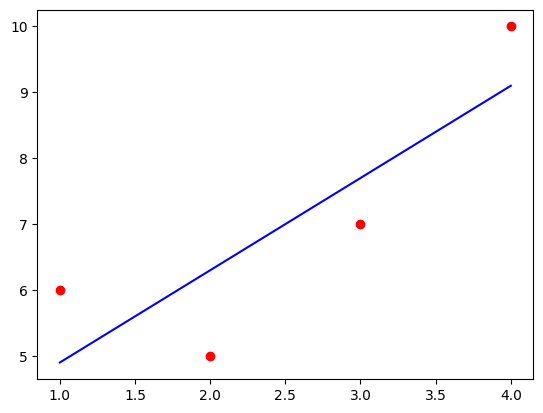

In [17]:
x_points = np.linspace(min(X[:, np.newaxis, 0]), max(X[:, np.newaxis, 0]), 100)
y_points = a + b * x_points

plt.plot(x_points, y_points, 'b')
plt.plot(X[:, np.newaxis, 0], y, 'ro')
plt.show()

## Un caso más serio

Se utilizará la base de datos ```diabetes``` del paquete ```scikit-learn```, que contiene datos de pacientes con diabetes (10 variables por observación), y una medida de la evolución de la enfermedad en un periodo de un año (variable a predecir $y$). Por tanto, ahora estamos en un caso de regresión multilineal.

In [18]:
diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target'].reshape(-1, 1)  # Target Variable (y): A quantitative measure of disease progression one year after baseline.

Repetimos lo mismo

In [19]:
dense1 = Layer_Dense(X.shape[1], 1)
# Activation function is linear (omitted)
loss_layer = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=0.01)

# Train loop
for epoch in range(100000):

    # Forward pass
    dense1.forward(X)
    loss = loss_layer.forward(dense1.output, y)
    
    if not epoch % 1000:
        print(f'epoch: {epoch}, loss: {np.mean(loss):.3f}')

    # Backward pass
    loss_layer.backward(dense1.output, y)
    dense1.backward(loss_layer.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)

epoch: 0, loss: 14537.178
epoch: 1000, loss: 2784.167
epoch: 2000, loss: 2630.196
epoch: 3000, loss: 2498.675
epoch: 4000, loss: 2386.021
epoch: 5000, loss: 2289.237
epoch: 6000, loss: 2205.819
epoch: 7000, loss: 2133.673
epoch: 8000, loss: 2071.047
epoch: 9000, loss: 2016.473
epoch: 10000, loss: 1968.725
epoch: 11000, loss: 1926.771
epoch: 12000, loss: 1889.749
epoch: 13000, loss: 1856.935
epoch: 14000, loss: 1827.719
epoch: 15000, loss: 1801.590
epoch: 16000, loss: 1778.117
epoch: 17000, loss: 1756.936
epoch: 18000, loss: 1737.741
epoch: 19000, loss: 1720.273
epoch: 20000, loss: 1704.311
epoch: 21000, loss: 1689.671
epoch: 22000, loss: 1676.193
epoch: 23000, loss: 1663.742
epoch: 24000, loss: 1652.203
epoch: 25000, loss: 1641.478
epoch: 26000, loss: 1631.481
epoch: 27000, loss: 1622.139
epoch: 28000, loss: 1613.389
epoch: 29000, loss: 1605.176
epoch: 30000, loss: 1597.453
epoch: 31000, loss: 1590.176
epoch: 32000, loss: 1583.310
epoch: 33000, loss: 1576.822
epoch: 34000, loss: 1570.6

El entrenamiento a concluido con una notable reducción de la función de pérdidas (podría seguirse más, o utilizar mejores optimizadores). Veamos una de las variables:

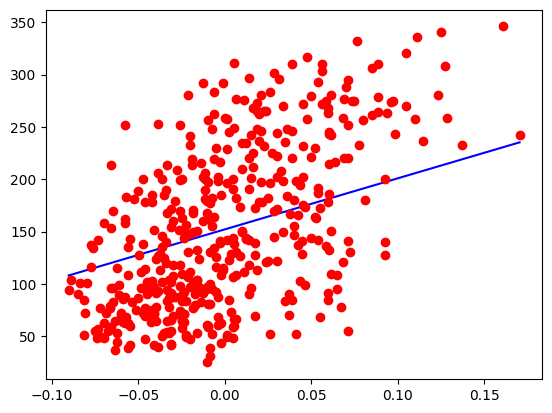

In [20]:
var_num = 2

x_points = np.linspace(min(X[:, np.newaxis, var_num]), max(X[:, np.newaxis, var_num]), 100)
y_points = dense1.biases.flatten() + dense1.weights[var_num] * x_points

plt.plot(x_points, y_points, 'b')
plt.plot(X[:, np.newaxis, var_num], y, 'ro')
plt.show()